<a href="https://colab.research.google.com/github/Muhammad-Usama-07/Audio-Processing/blob/main/AudioBasedWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import IPython
from scipy.io import wavfile
import scipy.signal
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Getting All Voice Data Names

In [ ]:
Audio_names = []
for names in glob('VoiceData/*.wav'):
  Audio_names.append(names)
  print(names)

VoiceData/chunk4.wav
VoiceData/chunk1.wav
VoiceData/chunk2.wav
VoiceData/chunk3.wav
VoiceData/chunk5.wav


# Play audio and Get Data from audio in different ways

In [ ]:
from playsound import playsound
playsound(Audio_names[0])

In [ ]:
from pydub import AudioSegment
from pydub.playback import play

song = AudioSegment.from_wav(Audio_names[0])
play(song)

### Read Data in byte form using (simpleaudio)

In [ ]:
import simpleaudio as sa

wave_obj = sa.WaveObject.from_wave_file(Audio_names[0])
# play_obj = wave_obj.play()
# play_obj.wait_done()
wave_obj.audio_data

In [ ]:
import winsound
winsound.PlaySound(Audio_names[0], winsound.SND_FILENAME)

### Read Data in float form using (soundfile)

In [ ]:
import sounddevice as sd
import soundfile as sf

data, fs = sf.read(Audio_names[0], dtype='float32')  
sd.play(data, fs)
status = sd.wait()

### Read Data in integar form using(scipy)

In [ ]:
from scipy.io.wavfile import read
from scipy.io.wavfile import write
import numpy as np

# Extracting rate and data from audio
samplerate, data = read('AudioData/audio.wav')
data

# Find Frame Rate of Audio

In [ ]:

import wave

good_morning_var = wave.open('good-morning.wav', 'r')
audio_framerate = good_morning_var.getframerate()
audio_framerate

44100

# Take bytes from audio

In [ ]:
import simpleaudio as sa

wave_obj = sa.WaveObject.from_wave_file('AudioData/audio.wav')

# get bytes without header
aud_data = wave_obj.audio_data
aud_data

In [ ]:

import wave

good_morning_var = wave.open('good-morning.wav', 'r')
signal = good_morning_var.readframes(-1)
print(signal[:10])

b'\xd3\xff\xa6\xff\x95\xff\xa0\xff\xa5\xff'


# Convert Bytes to Integar

In [ ]:
import numpy as np
import wave

good_morning_var = wave.open('good-morning.wav', 'r')
signal = good_morning_var.readframes(-1)
int_val_signal = np.frombuffer(signal, dtype = 'int16')
int_val_signal

array([ -45,  -90, -107, ...,   20,   13,    4], dtype=int16)

# Get Start and Stop of Audio

In [ ]:
from pydub import AudioSegment, silence

myaudio = AudioSegment.from_wav("SilanceTest/audio.wav")

# get all starts and stops of the audio in silence varaible 
silence = silence.detect_silence(myaudio, min_silence_len=100, silence_thresh=-16,)
print(silence)

# Convert Bytes to audio

In [ ]:
from pydub import AudioSegment

# With giving header and bytes
import simpleaudio as sa

wave_obj = sa.WaveObject.from_wave_file('AudioData/audio.wav')

aud_data = wave_obj.audio_data          # get bytes
sample_width=wave_obj.bytes_per_sample  # get sample width
frame_rate=wave_obj.sample_rate         # get sample rate
channels=wave_obj.num_channels          # get channel

myaudio = AudioSegment(aud_data, sample_width=wave_obj.bytes_per_sample, frame_rate=wave_obj.sample_rate, channels=wave_obj.num_channels)
myaudio

# Compare Timestamps of Two Audios Though Visualization

## Read files

In [12]:
import wave
import numpy as np
import matplotlib.pyplot as plt

good_morning_voice = wave.open('good_morning_voice.wav', 'r')
afternoon_voice = wave.open('good-afternoon_voice.wav', 'r')

## Convert voice data to integar

In [13]:
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')
soundwave_af = np.frombuffer(signal_af, dtype='int16')

## Take framerate of audios

In [14]:
framerate_gm = good_morning_voice.getframerate()
framerate_af = afternoon_voice.getframerate()

## Calculate timestamp of audios

In [15]:
time_gm = np.linspace(start=0,
                      stop=len(soundwave_gm)/framerate_gm,
					  num=len(soundwave_gm))
time_af = np.linspace(start=0,
                      stop=len(soundwave_af)/framerate_af,
					  num=len(soundwave_af))


## Plot result

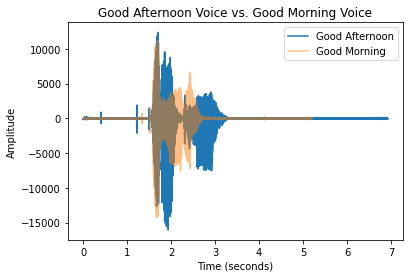

In [16]:
plt.title('Good Afternoon Voice vs. Good Morning Voice')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

plt.plot(time_af, soundwave_af, label='Good Afternoon')

plt.plot(time_gm, soundwave_gm, label='Good Morning', alpha=0.5)

plt.legend()
plt.show()

# Save silence removed wav file

In [ ]:
import io
from pydub import AudioSegment, silence
from pydub.silence import split_on_silence
import simpleaudio as sa

wave_obj = sa.WaveObject.from_wave_file('SilanceTest/10ARI8-1635618351.80791-in-1.wav')

aud_data = wave_obj.audio_data          # get bytes
sample_width=wave_obj.bytes_per_sample  # get sample width
frame_rate=wave_obj.sample_rate         # get sample rate
channels=wave_obj.num_channels          # get channel

myaudio = AudioSegment(aud_data, sample_width=wave_obj.bytes_per_sample, frame_rate=wave_obj.sample_rate, channels=wave_obj.num_channels)

# spliting audio files
audio_chunks = split_on_silence(myaudio, min_silence_len=500, silence_thresh=-40 )

#loop is used to iterate over the output list
chk = 0

for i, chunk in enumerate(audio_chunks):
    chk+=chunk
chk.export('silenceRemoved.wav', format="wav")
